<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [57]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
pd.set_option('display.max_rows', 300)

In [42]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [9]:
print('Number of males is %d' % len(data[data['sex'] == 'Male']))
print('Number of females is %d' % len(data[data['sex'] == 'Female']))

Number of males is 21790
Number of females is 10771


**2. Каков средний возраст (признак *age*) женщин?**

In [13]:
data[data['sex'] == 'Female']['age'].mean()

36.858230433571627

**3. Какова доля граждан Германии (признак *native-country*)?**

In [17]:
(data['native-country'] == 'Germany').astype(int).mean()

0.0042074874850281012

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

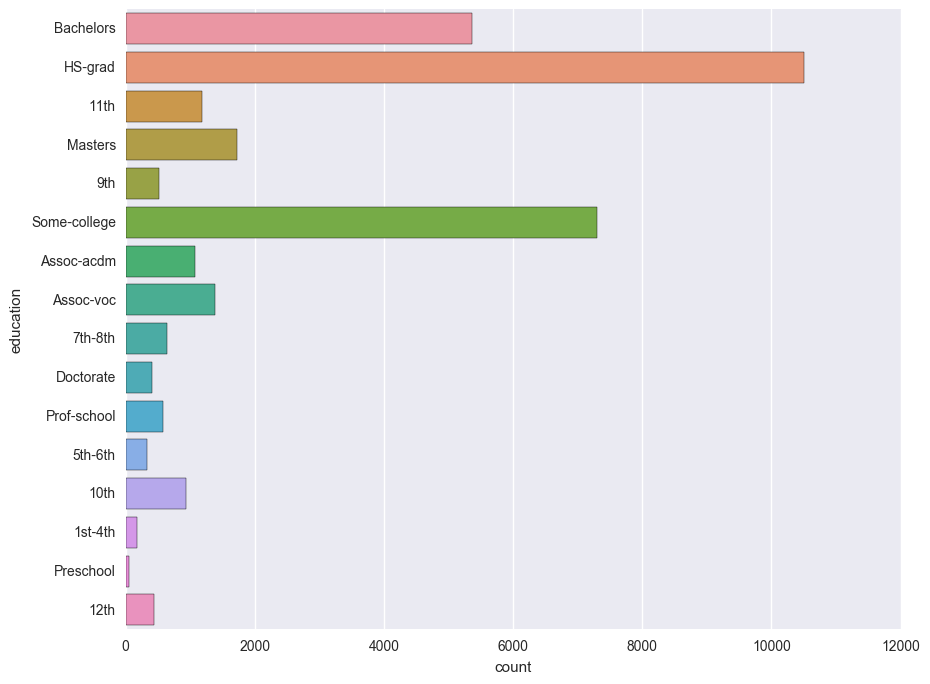

In [27]:
sns.countplot(y = 'education', data = data)

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [30]:
data.groupby('salary')['age'].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

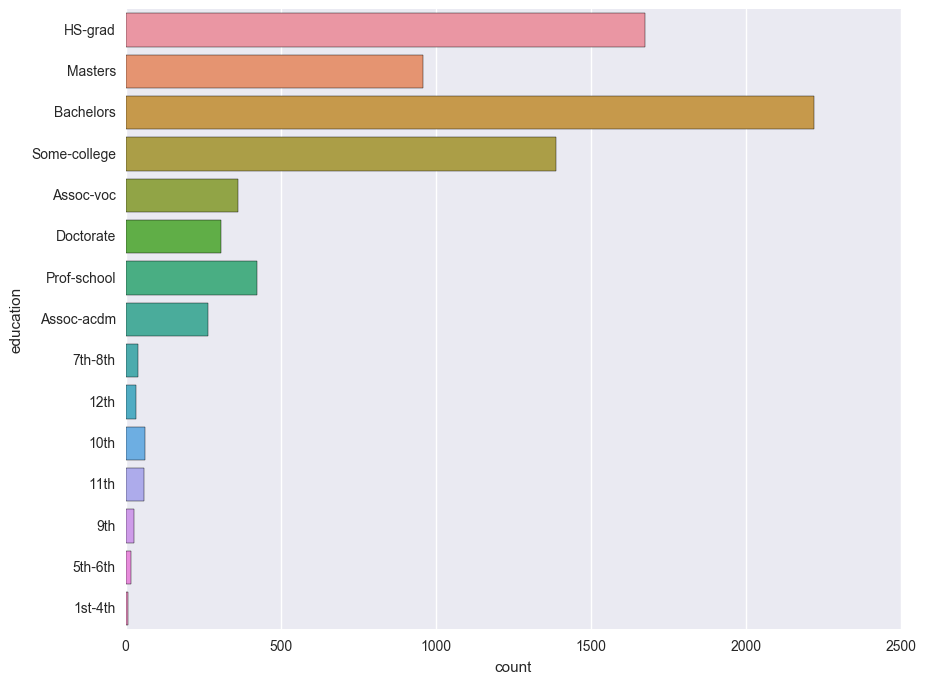

In [31]:
sns.countplot(y = 'education', data = data[data['salary'] == '>50K'])

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [58]:
data.groupby(['race', 'sex'])['age'].describe().to_frame()

age
race               sex                       
Amer-Indian-Eskimo Female count    119.000000
                          mean      37.117647
                          std       13.114991
                          min       17.000000
                          25%       27.000000
                          50%       36.000000
                          75%       46.000000
                          max       80.000000
                   Male   count    192.000000
                          mean      37.208333
                          std       12.049563
                          min       17.000000
                          25%       28.000000
                          50%       35.000000
                          75%       45.000000
                          max       82.000000
Asian-Pac-Islander Female count    346.000000
                          mean      35.089595
                          std       12.300845
                          min       17.000000
                          25%       25.000000
                          50%       33.000000
                          75%       43.750000
                          max       75.000000
                   Male   count    693.000000
                          mean      39.073593
                          std       12.883944
                          min       18.000000
                          25%       29.000000
                          50%       37.000000
                          75%       46.000000
                          max       90.000000
Black              Female count   1555.000000
                          mean      37.854019
                          std       12.637197
                          min       17.000000
                          25%       28.000000
                          50%       37.000000
                          75%       46.000000
                          max       90.000000
                   Male   count   1569.000000
                          mean      37.682600
                          std       12.882612
                          min       17.000000
                          25%       27.000000
                          50%       36.000000
                          75%       46.000000
                          max       90.000000
Other              Female count    109.000000
                          mean      31.678899
                          std       11.631599
                          min       17.000000
                          25%       23.000000
                          50%       29.000000
                          75%       39.000000
                          max       74.000000
                   Male   count    162.000000
                          mean      34.654321
                          std       11.355531
                          min       17.000000
                          25%       26.000000
                          50%       32.000000
                          75%       42.000000
                          max       77.000000
White              Female count   8642.000000
                          mean      36.811618
                          std       14.329093
                          min       17.000000
                          25%       25.000000
                          50%       35.000000
                          75%       46.000000
                          max       90.000000
                   Male   count  19174.000000
                          mean      39.652498
                          std       13.436029
                          min       17.000000
                          25%       29.000000
                          50%       38.000000
                          75%       49.000000
                          max       90.000000

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married*, остальных считаем холостыми.**

In [46]:
data['marriage'] = data['marital-status'].map(lambda x: 'Married' if x.startswith('Married') else 'Single')
pd.crosstab(data['salary'], data['marriage'], margins=True)

marriage,Married,Single,All
salary,,,
<=50K,8681,16039,24720
>50K,6736,1105,7841
All,15417,17144,32561


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

Max hours per week - 99
Number of people who works max hours per week - 85
Precent of people with >50K salary - 0.294118


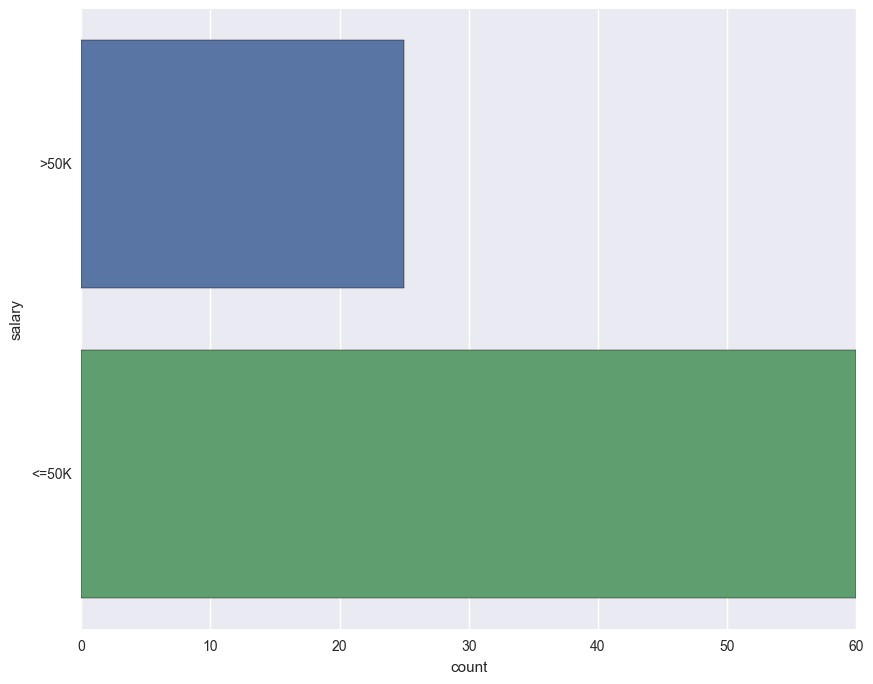

In [54]:
max_hours_per_week = data['hours-per-week'].max()
print('Max hours per week - %d' % max_hours_per_week)
print('Number of people who works max hours per week - %d' % len(data[data['hours-per-week'] == 99]))
print('Precent of people with >50K salary - %f' % (data[data['hours-per-week'] == 99]['salary'] == '>50K').astype(int).mean())
sns.countplot(y = 'salary', data = data[data['hours-per-week'] == 99])

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих много и мало (*salary*) для каждой страны (*native-country*).**

In [59]:
data.groupby(['salary', 'native-country'])['hours-per-week'].mean().to_frame()

hours-per-week
salary native-country                            
<=50K  ?                                40.164760
       Cambodia                         41.416667
       Canada                           37.914634
       China                            37.381818
       Columbia                         38.684211
       Cuba                             37.985714
       Dominican-Republic               42.338235
       Ecuador                          38.041667
       El-Salvador                      36.030928
       England                          40.483333
       France                           41.058824
       Germany                          39.139785
       Greece                           41.809524
       Guatemala                        39.360656
       Haiti                            36.325000
       Holand-Netherlands               40.000000
       Honduras                         34.333333
       Hong                             39.142857
       Hungary                          31.300000
       India                            38.233333
       Iran                             41.440000
       Ireland                          40.947368
       Italy                            39.625000
       Jamaica                          38.239437
       Japan                            41.000000
       Laos                             40.375000
       Mexico                           40.003279
       Nicaragua                        36.093750
       Outlying-US(Guam-USVI-etc)       41.857143
       Peru                             35.068966
       Philippines                      38.065693
       Poland                           38.166667
       Portugal                         41.939394
       Puerto-Rico                      38.470588
       Scotland                         39.444444
       South                            40.156250
       Taiwan                           33.774194
       Thailand                         42.866667
       Trinadad&Tobago                  37.058824
       United-States                    38.799127
       Vietnam                          37.193548
       Yugoslavia                       41.600000
>50K   ?                                45.547945
       Cambodia                         40.000000
       Canada                           45.641026
       China                            38.900000
       Columbia                         50.000000
       Cuba                             42.440000
       Dominican-Republic               47.000000
       Ecuador                          48.750000
       El-Salvador                      45.000000
       England                          44.533333
       France                           50.750000
       Germany                          44.977273
       Greece                           50.625000
       Guatemala                        36.666667
       Haiti                            42.750000
       Honduras                         60.000000
       Hong                             45.000000
       Hungary                          50.000000
       India                            46.475000
       Iran                             47.500000
       Ireland                          48.000000
       Italy                            45.400000
       Jamaica                          41.100000
       Japan                            47.958333
       Laos                             40.000000
       Mexico                           46.575758
       Nicaragua                        37.500000
       Peru                             40.000000
       Philippines                      43.032787
       Poland                           39.000000
       Portugal                         41.500000
       Puerto-Rico                      39.416667
       Scotland                         46.666667
       South                            51.437500
       Taiwan                           46.800000
       Thailand                         58.333333
       Trinadad&Tobago             